In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow
import threading
from tensorflow import keras
%matplotlib inline
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import utils

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullower', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

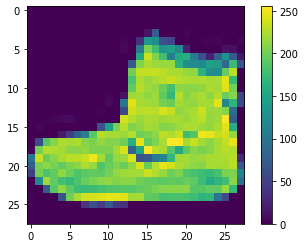

In [4]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)

In [5]:
x_train = x_train/255
x_test = x_test/255

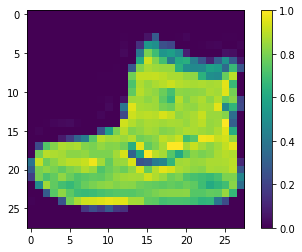

In [6]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)

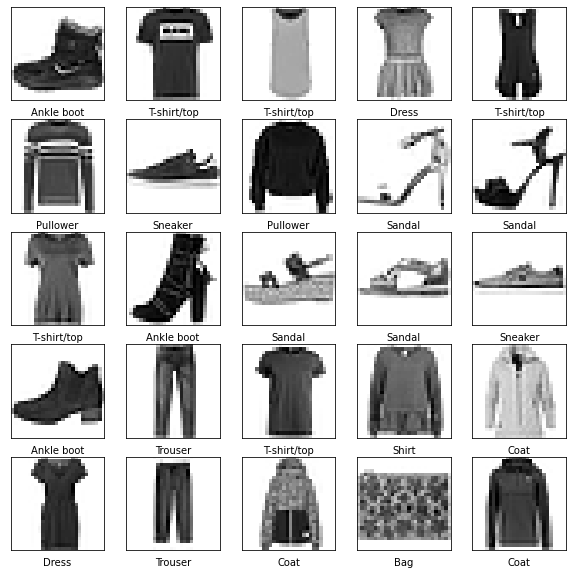

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [9]:
model.compile(optimizer=tensorflow.keras.optimizers.SGD(), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
# for i in range(4):
#     print(f"Model trains {i} times")
#     model.fit(x_train, y_train, epochs=10)
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7477 - accuracy: 0.7577
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5139 - accuracy: 0.8251
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4667 - accuracy: 0.8400
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4407 - accuracy: 0.8475
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4223 - accuracy: 0.8535
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4072 - accuracy: 0.8581
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3960 - accuracy: 0.8620
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3858 - accuracy: 0.8659
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3773 - accuracy: 0.8689
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.368

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy =", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4023 - accuracy: 0.8581
Test accuracy = 0.8580999970436096


In [12]:
predictions = model.predict(x_train)

1875/1875 [==============================] - 3s 1ms/step


In [13]:
predictions[12]

array([4.0171552e-04, 3.3951765e-05, 8.9897658e-05, 1.0183360e-04,
       1.4711550e-04, 9.6199566e-01, 1.0737764e-03, 2.2758327e-02,
       2.2119589e-03, 1.1185699e-02], dtype=float32)

In [14]:
item_index = int(input("Введите числo от 0 до 5999: "))
np.argmax(predictions[item_index])
y_train[item_index]

8

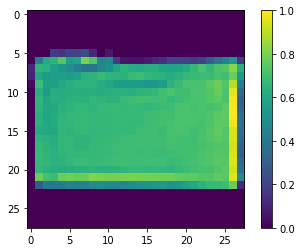

In [15]:
plt.figure()
plt.imshow(x_train[item_index])
plt.colorbar()
plt.grid(False)

In [16]:
class_names[np.argmax(predictions[item_index])]

'Bag'